This notebook is for generating figures for Abstract 2 (Fibre strain homogeneity versus longitudinal strain) for HRS

Using pyvista

We only look at:

* Endocardial fibres
* Using the atlas when looking regionally
* **Only using DT-MRI Fibres**

This notebook specifically is only using Area Strain for comparison with fiber strains. Not squeez or any sqrt of area strain.

Possible justification:

Green Strain when projected onto a direction (Bonet and Wood) is:

$\frac{1}{2} \left( \frac{dl^2 - dL^2}{dL^2} \right) = N^T E N$

where 

$dl - dL$ is the engineering strain.

Area Strain is defined:

$\frac{A(t) - A(t_0)}{A(t_0)}$.

Since Area of a triangular element is

$A \sim \frac{1}{2} ab$

then area strain is like

$\frac{ab - AB}{AB}$

which has same dimensions (lengths squared) as in Green Strain component. Need to worry about the factor of 1/2 ?

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns
import numpy as np
from hrs_23_figures import *
import pyvista as pv
from scipy import stats
from sklearn.metrics import mean_squared_error

all_cases = af_cases + nonaf_cases

len(all_cases)

29

# Global

In [2]:
## Using percentiles
## 
## First fig:
## How does global spread of strains compare between areaitudinal
## fiber atlas and rule-based fibers? 

frame=4
upper_percent=99
# fibre_arch="endo_avg"

## Following arrays contain global strain standard deviation,
## mean and median for all cases
## Stored for all architectures and rule-based fibers

fib_std=np.zeros((len(all_cases),9))
fib_mean=np.zeros((len(all_cases),9))
fib_med=np.zeros((len(all_cases),9))

area_std=np.zeros((len(all_cases),))
area_mean=np.zeros((len(all_cases),))
area_med=np.zeros((len(all_cases),))

fib_arch_list = ["endo_1", "endo_2", "endo_3", "endo_4",
                 "endo_5", "endo_6", "endo_7", "endo_avg", 
                 "endo_l"]

for i in range(0, len(all_cases)):
    
    case=all_cases[i]
#     print(all_cases[i])
    
    for j in range(0, len(fib_arch_list)):
        
#         print(fib_arch_list[j])
        
        fib_data = retrieve_fibres_all_data(case, fib_arch_list[j], 
                                            frame)['f1']
        data_bounds = np.percentile(fib_data, [0, upper_percent])
        condition = fib_data[:] > data_bounds[1]
        fib_data[condition]=np.nan
        
        fib_std[i, j] = np.nanstd(fib_data)
        fib_mean[i, j] = np.nanmean(fib_data)
        fib_med[i, j] = np.nanmedian(fib_data)

    area_data = retrieve_area_strain_all_data(case, "area", frame)['Area']

    area_data_bounds = np.percentile(area_data, [0, upper_percent])
    condition_l = area_data[:] > area_data_bounds[1]
    area_data[condition_l]=np.nan

    area_std[i] = np.nanstd(area_data)
    area_mean[i] = np.nanmean(area_data)
    area_med[i] = np.nanmedian(area_data)
    
#     print(case, "\t", std, "\t", std_l)

In [3]:
# np.sum(condition_l)
np.sum(area_data.isna())

1864

## Abstract Figures

Using only the endo_avg DT-MRI architecture

In [4]:
## Regionally 

frame=4
upper_percent=99
# fib_arch="endo_avg"

## N_cases, N_regions

fib_reg_std=np.zeros((len(all_cases),5,2))
fib_reg_mean=np.zeros((len(all_cases),5,2))
fib_reg_med=np.zeros((len(all_cases),5,2))

area_reg_std=np.zeros((len(all_cases),5))
area_reg_mean=np.zeros((len(all_cases),5))
area_reg_med=np.zeros((len(all_cases),5))

p_val_std=np.zeros((5,))

regions = ["roof", "sept", "lat", "ant", "post"]
fibre_arch_list = ["endo_avg", "endo_l"]

for i in range(0, len(all_cases)):
    case=all_cases[i]
#     print(case)
    
    for region_j in range(0,len(regions)):
        region = regions[region_j]
#         print(region)

        for fib_k in range(0,len(fibre_arch_list)):
            fib_arch = fibre_arch_list[fib_k]
#             print(fib_arch)
    
            ## All regional cell data
            ## Fibres
            data = extract_region(case, fib_arch, frame,
                                  region_j+1)['f1']
            data_bounds = np.percentile(data, [0, upper_percent])
            condition = data[:] > data_bounds[1]
            data[condition]=np.nan
            
            fib_reg_std[i, region_j, fib_k]=np.nanstd(data)
            fib_reg_mean[i, region_j, fib_k]=np.nanmean(data)
            fib_reg_med[i, region_j, fib_k]=np.nanmedian(data)

        ## All regional cell data
        ## areaitudinal
        area_data = extract_region_area(case, 'area', frame, region_j+1)['Area']
        
        area_data_bounds = np.percentile(area_data, [0, upper_percent])
        condition_l = area_data[:] > area_data_bounds[1]
        area_data[condition_l]=np.nan
        
        area_reg_std[i, region_j]=np.nanstd(area_data)
        area_reg_mean[i, region_j]=np.nanmean(area_data)
        area_reg_med[i, region_j]=np.nanmedian(area_data)
        
#         print(case, "\t", std, "\t", std_l)

# for i in range(0, len(regions)):
#     p_val_std[i] = stats.ttest_ind(fib_std[:, i], area_std[:, i])[-1]

#     print(p_val_std[i])
    
## More pronounced differences between spread of strain values
## area seems to have more homogeneous strains except for the lateral wall

In [5]:
np.sum(condition_l)
np.sum(area_data.isna())
# area_data_bounds[0]

479

In [6]:
regions

['roof', 'sept', 'lat', 'ant', 'post']

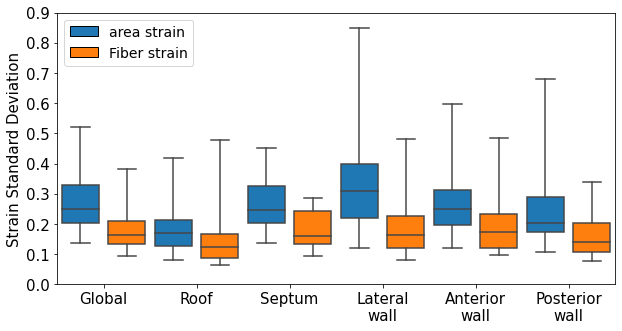

In [7]:
## Plotting
## Std deviation
## Reigonally 

fig, ((ax1)) = plt.subplots(1,1,figsize=(10,5), 
                            facecolor='white', sharey=True)

data_to_plot = [area_std[:], fib_std[:, 7],
                area_reg_std[:, 0], fib_reg_std[:, 0, 0],
                area_reg_std[:, 1], fib_reg_std[:, 1, 0],
                area_reg_std[:, 2], fib_reg_std[:, 2, 0],
                area_reg_std[:, 3], fib_reg_std[:, 3, 0],
                area_reg_std[:, 4], fib_reg_std[:, 4, 0]]
               

sns.boxplot(data=data_to_plot, ax=ax1, whis=(0,100))

for i in range(0, 12, 2):
    mybox = ax1.patches[i]
    mybox.set_facecolor('tab:blue')
    
    mybox = ax1.patches[i+1]
    mybox.set_facecolor('tab:orange')

region_lab = ['Roof', 'Septum', 'Lateral\nwall', 'Anterior\nwall',
              'Posterior\nwall']
x_labs = []
x_labs.append("Global")
x_labs += region_lab

plt.yticks(fontsize=15)
plt.ylabel("Strain Standard Deviation", fontsize=15)
plt.xticks(np.arange(0.5, 11.5, 2), x_labs, fontsize=15)
plt.ylim(0,0.9)

legend_elements = [Patch(facecolor='tab:blue', edgecolor='black',
                         label='area strain'),
                   Patch(facecolor='tab:orange', edgecolor='black',
                         label='Fiber strain')]
ax1.legend(handles=legend_elements, loc='upper left', fontsize=14)

# plt.savefig("/home/csi20/Dropbox/phd/Documents/HRS23/abstract_2/boxplots_1.png",
#            dpi=200, bbox_inches="tight")

In [35]:
## p values between two fib arch;s for all regions

pval_glob_area_dtmri = stats.ttest_ind(
    area_std[:], fib_std[:, 7])[-1]

# pval_reg_fibs = np.zeros((5,))

# print("Between fibres:")

# for region_i in range(0, 5):
    
#     pval_reg_fibs[region_i] = stats.ttest_ind(
#         fib_reg_std[:, region_i, 0], fib_reg_std[:, region_i, 1])[-1]
    
#     print(f"Region: {regions[region_i]}", 
#           f"pval: {np.round(pval_reg_fibs[region_i],3)}")
    
pval_reg_area_dtmri_fibs = np.zeros((5,))

print("\nBetween area and DTMRI fibres:")

for region_i in range(0, 5):
    
    pval_reg_fibs[region_i] = stats.ttest_ind(
        fib_reg_std[:, region_i, 0], area_reg_std[:, region_i])[-1]
    
    print(f"Region: {regions[region_i]}", 
          f"pval: {np.round(pval_reg_fibs[region_i],4)}")

print(f"Global: ", f"pval: {np.round(pval_glob_area_dtmri, 4)}")


Between area and DTMRI fibres:
Region: roof pval: 0.0727
Region: sept pval: 0.0001
Region: lat pval: 0.0002
Region: ant pval: 0.0033
Region: post pval: 0.0006
Global:  pval: 0.0002


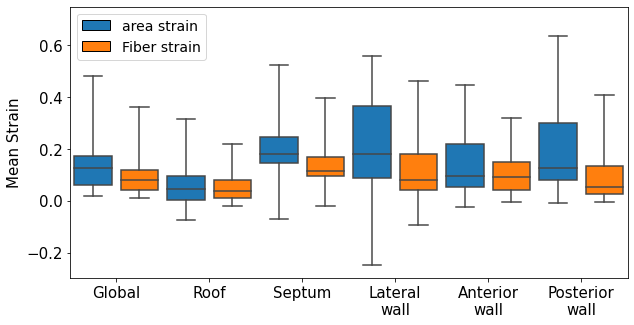

In [36]:
## Plotting
## Mean
## Regionally

fig, ((ax1)) = plt.subplots(1,1,figsize=(10,5), 
                            facecolor='white', sharey=True)

data_to_plot = [area_mean[:], fib_mean[:, -2],
                area_reg_mean[:, 0], fib_reg_mean[:, 0, 0],
                area_reg_mean[:, 1], fib_reg_mean[:, 1, 0],
                area_reg_mean[:, 2], fib_reg_mean[:, 2, 0],
                area_reg_mean[:, 3], fib_reg_mean[:, 3, 0],
                area_reg_mean[:, 4], fib_reg_mean[:, 4, 0]]
               

sns.boxplot(data=data_to_plot, ax=ax1, whis=(0,100))

for i in range(0, 12, 2):
    mybox = ax1.patches[i]
    mybox.set_facecolor('tab:blue')
    
    mybox = ax1.patches[i+1]
    mybox.set_facecolor('tab:orange')

x_labs = []
x_labs.append("Global")
x_labs += region_lab

plt.ylabel("Mean Strain", fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(np.arange(0.5, 11.5, 2), x_labs, fontsize=15)
plt.ylim(-0.3, 0.75)

legend_elements = [Patch(facecolor='tab:blue', edgecolor='black',
                         label='area strain'),
                   Patch(facecolor='tab:orange', edgecolor='black',
                         label='Fiber strain')]
ax1.legend(handles=legend_elements, loc='upper left', fontsize=14)

# plt.savefig("/home/csi20/Dropbox/phd/Documents/HRS23/abstract_2/mean_boxplots_1.png",
#            dpi=200, bbox_inches="tight")

In [37]:
## p values

pval_glob = stats.ttest_ind(area_mean[:], fib_mean[:, 7])[-1]

# pval_reg_fibs = np.zeros((5,))

# print("Between fibres:")

# for region_i in range(0, pval_reg_fibs.shape[0]):
    
#     pval_reg_fibs[region_i] = stats.ttest_ind(
#         fib_reg_mean[:, region_i, 0], fib_reg_mean[:, region_i, 1])[-1]
    
#     print(f"Region: {regions[region_i]}", 
#           f"pval: {np.round(pval_reg_fibs[region_i],3)}")
    
pval_reg_area_dtmri_fibs = np.zeros((5,))

print("\nBetween area and DTMRI fibres:")

for region_i in range(0, pval_reg_area_dtmri_fibs.shape[0]):
    
    pval_reg_fibs[region_i] = stats.ttest_ind(
        fib_reg_mean[:, region_i, 0], area_reg_mean[:, region_i])[-1]
    
    print(f"Region: {regions[region_i]}", 
          f"pval: {np.round(pval_reg_fibs[region_i],3)}")

print("Global: ", f"{np.round(pval_glob, 3)}")


Between area and DTMRI fibres:
Region: roof pval: 0.947
Region: sept pval: 0.019
Region: lat pval: 0.027
Region: ant pval: 0.215
Region: post pval: 0.007
Global:  0.072


# Scatter Plots

Enable one to gain a case-by-case comparison of quantities

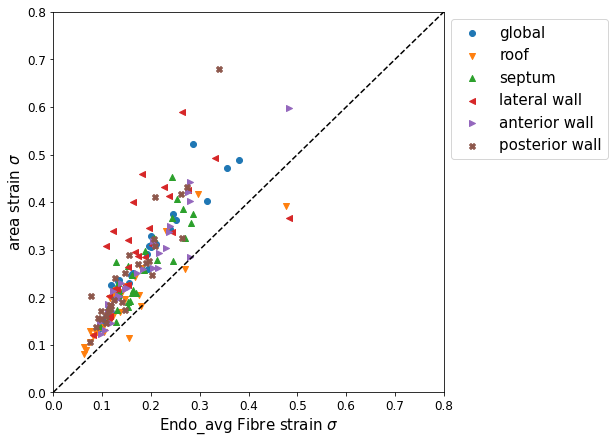

In [11]:
## Plotting Std Dev

fig, ((ax1)) = plt.subplots(1,1,figsize=(7,7), 
                            facecolor='white', sharey=True)

## Scatter plot enables one to look on a case by case basis

ax1.scatter(fib_std[:, -2], area_std[:], label="global", marker="o")
ax1.scatter(fib_reg_std[:, 0, 0], area_reg_std[:, 0], label="roof", marker="v")
ax1.scatter(fib_reg_std[:, 1, 0], area_reg_std[:, 1], label="septum", marker="^")
ax1.scatter(fib_reg_std[:, 2, 0], area_reg_std[:, 2], label="lateral wall", marker="<")
ax1.scatter(fib_reg_std[:, 3, 0], area_reg_std[:, 3], label="anterior wall", marker=">")
ax1.scatter(fib_reg_std[:, 4, 0], area_reg_std[:, 4], label="posterior wall", marker="X")

ax1.plot(np.arange(0,1,0.1), np.arange(0,1,0.1), ls='--', c='black')

ax1.set_xlabel("Endo_avg Fibre strain $\sigma$", fontsize=15)
ax1.set_ylabel("area strain $\sigma$", fontsize=15)
plt.ylim(0.0, 0.8)
plt.xlim(0.0, 0.8)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

ax1.legend(fontsize=15, bbox_to_anchor=(1., 1.))

Text(0.5, -0.02, 'Fibre Strain Standard Deviation')

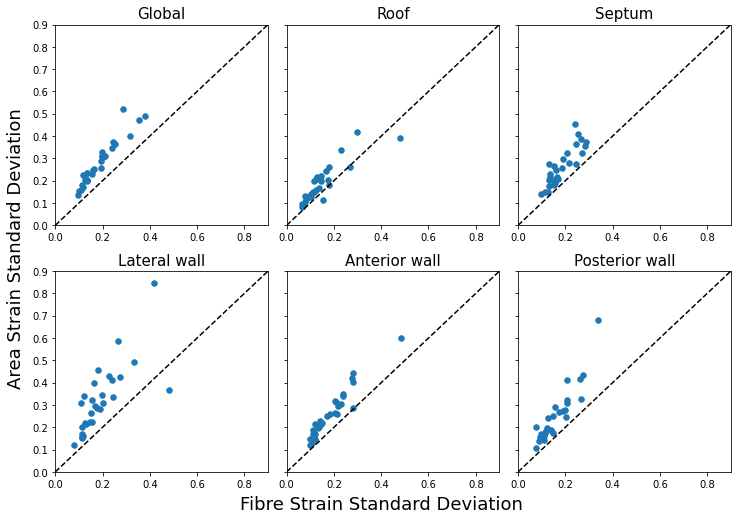

In [12]:
## Plotting Std Dev

fig, ((ax1, ax2, ax3), 
      (ax4, ax5, ax6)) = plt.subplots(2,3,figsize=(10,7), 
                            facecolor='white', sharey=True)

## Scatter plot enables one to look on a case by case basis

ax1.scatter(fib_std[:, -2], area_std[:], label="Global",s=30, alpha=1.0)
ax2.scatter(fib_reg_std[:, 0, 0], area_reg_std[:, 0], label="Roof",s=30, alpha=1.0)
ax3.scatter(fib_reg_std[:, 1, 0], area_reg_std[:, 1], label="Septum",s=30, alpha=1.0)
ax4.scatter(fib_reg_std[:, 2, 0], area_reg_std[:, 2], label="Lateral wall",s=30, alpha=1.0)
ax5.scatter(fib_reg_std[:, 3, 0], area_reg_std[:, 3], label="Anterior wall",s=30, alpha=1.0)
ax6.scatter(fib_reg_std[:, 4, 0], area_reg_std[:, 4], label="Posterior wall",s=30, alpha=1.0)

ax1.plot(np.arange(0,1,0.1), np.arange(0,1,0.1), ls='--', c='black')
ax2.plot(np.arange(0,1,0.1), np.arange(0,1,0.1), ls='--', c='black')
ax3.plot(np.arange(0,1,0.1), np.arange(0,1,0.1), ls='--', c='black')
ax4.plot(np.arange(0,1,0.1), np.arange(0,1,0.1), ls='--', c='black')
ax5.plot(np.arange(0,1,0.1), np.arange(0,1,0.1), ls='--', c='black')
ax6.plot(np.arange(0,1,0.1), np.arange(0,1,0.1), ls='--', c='black')

# ax1.set_xlabel("Fibre strain Standard Deviation", fontsize=20)
ax1.set_ylim(0.0, 0.9)
ax1.set_xlim(0.0, 0.9)
ax2.set_ylim(0.0, 0.9)
ax2.set_xlim(0.0, 0.9)
ax3.set_ylim(0.0, 0.9)
ax3.set_xlim(0.0, 0.9)
ax4.set_ylim(0.0, 0.9)
ax4.set_xlim(0.0, 0.9)
ax5.set_ylim(0.0, 0.9)
ax5.set_xlim(0.0, 0.9)
ax6.set_ylim(0.0, 0.9)
ax6.set_xlim(0.0, 0.9)

ax1.set_title("Global", fontsize=15)
ax2.set_title("Roof", fontsize=15)
ax3.set_title("Septum", fontsize=15)
ax4.set_title("Lateral wall", fontsize=15)
ax5.set_title("Anterior wall", fontsize=15)
ax6.set_title("Posterior wall", fontsize=15)
plt.tight_layout()

plt.yticks(fontsize=15)
fig.text(-0.02, 0.5, "Area Strain Standard Deviation",
         va='center', rotation='vertical', fontsize=18)
fig.text(0.5, -0.02, "Fibre Strain Standard Deviation", 
         ha='center', fontsize=18)

# plt.savefig("/home/csi20/Dropbox/phd/Documents/HRS23/abstract_2/stddev_scatter_areastrains.png",
#            dpi=200, bbox_inches="tight")

In [13]:
## Calculate pearson r coeff between area and DTMRI fibs
## Calculate rmse

pearsonr_glob = stats.pearsonr(fib_std[:, -2], area_std[:])
pearsonr_reg = np.zeros((5,))

RMSE_glob = mean_squared_error(fib_std[:, -2], area_std[:], 
                               squared=False)
RMSE_reg = np.zeros((5,))

print(f"Global:\t\tr:\t{np.round(pearsonr_glob[0],3)}\trmse:\t{np.round(RMSE_glob, 3)}")

for i in range(0, 5):
    pearsonr_reg[i] = stats.pearsonr(fib_reg_std[:, i, 0], 
                                 area_reg_std[:, i])[0]
    RMSE_reg[i] = mean_squared_error(fib_reg_std[:, i, 0], 
                                 area_reg_std[:, i], squared=False)
    

    print(f"Region: {regions[i]}",
         f"\tr:\t{np.round(pearsonr_reg[i],3)}",
         f"\trmse:\t{np.round(RMSE_reg[i],3)}")

Global:		r:	0.957	rmse:	0.1
Region: roof 	r:	0.878 	rmse:	0.058
Region: sept 	r:	0.872 	rmse:	0.09
Region: lat 	r:	0.747 	rmse:	0.167
Region: ant 	r:	0.958 	rmse:	0.085
Region: post 	r:	0.923 	rmse:	0.111


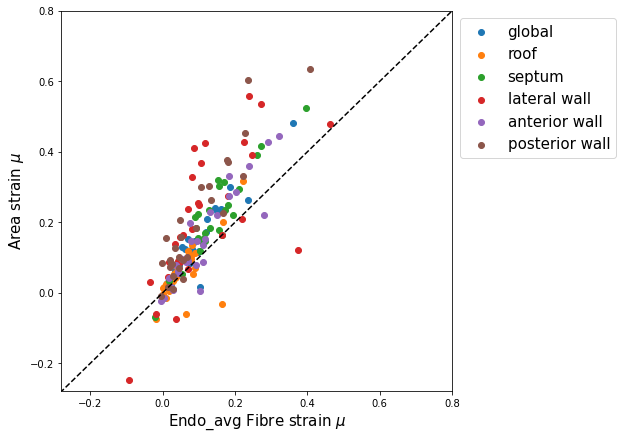

In [14]:
## Plot Mean

fig, ((ax1)) = plt.subplots(1,1,figsize=(7,7), 
                            facecolor='white', sharey=True)

ax1.scatter(fib_mean[:, -2], area_mean[:], label="global")
ax1.scatter(fib_reg_mean[:, 0, 0], area_reg_mean[:, 0], label="roof")
ax1.scatter(fib_reg_mean[:, 1, 0], area_reg_mean[:, 1], label="septum")
ax1.scatter(fib_reg_mean[:, 2, 0], area_reg_mean[:, 2], label="lateral wall")
ax1.scatter(fib_reg_mean[:, 3, 0], area_reg_mean[:, 3], label="anterior wall")
ax1.scatter(fib_reg_mean[:, 4, 0], area_reg_mean[:, 4], label="posterior wall")

ax1.plot(np.arange(-0.3,1,0.1), np.arange(-0.3,1,0.1), ls='--', c='black')

ax1.set_xlabel("Endo_avg Fibre strain $\mu$", fontsize=15)
ax1.set_ylabel("Area strain $\mu$", fontsize=15)
plt.ylim(-0.28, 0.8)
plt.xlim(-0.28, 0.8)

ax1.legend(fontsize=15, bbox_to_anchor=(1., 1.))

Text(0.5, -0.02, 'Fibre Strain Mean')

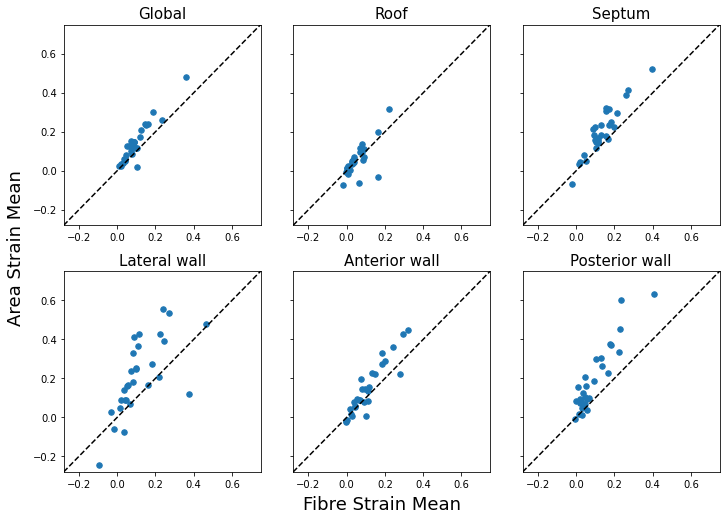

In [15]:
## Plotting Mean

fig, ((ax1, ax2, ax3), 
      (ax4, ax5, ax6)) = plt.subplots(2,3,figsize=(10,7), 
                            facecolor='white', sharey=True)

## Scatter plot enables one to look on a case by case basis

ax1.scatter(fib_mean[:, -2], area_mean[:], label="Global",s=30, alpha=1.0)
ax2.scatter(fib_reg_mean[:, 0, 0], area_reg_mean[:, 0], label="Roof",s=30, alpha=1.0)
ax3.scatter(fib_reg_mean[:, 1, 0], area_reg_mean[:, 1], label="Septum",s=30, alpha=1.0)
ax4.scatter(fib_reg_mean[:, 2, 0], area_reg_mean[:, 2], label="Lateral wall",s=30, alpha=1.0)
ax5.scatter(fib_reg_mean[:, 3, 0], area_reg_mean[:, 3], label="Anterior wall",s=30, alpha=1.0)
ax6.scatter(fib_reg_mean[:, 4, 0], area_reg_mean[:, 4], label="Posterior wall",s=30, alpha=1.0)

ax1.plot(np.arange(-0.28,1,0.1), np.arange(-0.28,1,0.1), ls='--', c='black')
ax2.plot(np.arange(-0.28,1,0.1), np.arange(-0.28,1,0.1), ls='--', c='black')
ax3.plot(np.arange(-0.28,1,0.1), np.arange(-0.28,1,0.1), ls='--', c='black')
ax4.plot(np.arange(-0.28,1,0.1), np.arange(-0.28,1,0.1), ls='--', c='black')
ax5.plot(np.arange(-0.28,1,0.1), np.arange(-0.28,1,0.1), ls='--', c='black')
ax6.plot(np.arange(-0.28,1,0.1), np.arange(-0.28,1,0.1), ls='--', c='black')

# ax1.set_xlabel("Fibre strain Standard Deviation", fontsize=20)
ax1.set_ylim(-0.28, 0.75)
ax1.set_xlim(-0.28, 0.75)
ax2.set_ylim(-0.28, 0.75)
ax2.set_xlim(-0.28, 0.75)
ax3.set_ylim(-0.28, 0.75)
ax3.set_xlim(-0.28, 0.75)
ax4.set_ylim(-0.28, 0.75)
ax4.set_xlim(-0.28, 0.75)
ax5.set_ylim(-0.28, 0.75)
ax5.set_xlim(-0.28, 0.75)
ax6.set_ylim(-0.28, 0.75)
ax6.set_xlim(-0.28, 0.75)

ax1.set_title("Global", fontsize=15)
ax2.set_title("Roof", fontsize=15)
ax3.set_title("Septum", fontsize=15)
ax4.set_title("Lateral wall", fontsize=15)
ax5.set_title("Anterior wall", fontsize=15)
ax6.set_title("Posterior wall", fontsize=15)
plt.tight_layout()

plt.yticks(fontsize=15)
# plt.xticks(fontsize=15)
fig.text(-0.02, 0.5, "Area Strain Mean",
         va='center', rotation='vertical', fontsize=18)
fig.text(0.5, -0.02, "Fibre Strain Mean", 
         ha='center', fontsize=18)

# plt.savefig("/home/csi20/Dropbox/phd/Documents/HRS23/abstract_2/mean_scatter_areastrains.png",
#            dpi=200, bbox_inches="tight")

In [16]:
## Calculate pearson r coeff between area and DTMRI fibs
## Calculate rmse

pearsonr_glob = stats.pearsonr(fib_mean[:, -2], area_mean[:])
pearsonr_reg = np.zeros((5,))

RMSE_glob = mean_squared_error(fib_mean[:, -2], area_mean[:], 
                               squared=False)
RMSE_reg = np.zeros((5,))

print(f"Global:\t\tr:\t{np.round(pearsonr_glob[0],3)}\trmse:\t{np.round(RMSE_glob, 3)}")

for i in range(0, 5):
    pearsonr_reg[i] = stats.pearsonr(fib_reg_mean[:, i, 0], 
                                 area_reg_mean[:, i])[0]
    RMSE_reg[i] = mean_squared_error(fib_reg_mean[:, i, 0], 
                                 area_reg_mean[:, i], squared=False)
    

    print(f"Region: {regions[i]}",
         f"\tr:\t{np.round(pearsonr_reg[i],3)}",
         f"\trmse:\t{np.round(RMSE_reg[i],3)}")

Global:		r:	0.936	rmse:	0.059
Region: roof 	r:	0.73 	rmse:	0.053
Region: sept 	r:	0.93 	rmse:	0.086
Region: lat 	r:	0.686 	rmse:	0.167
Region: ant 	r:	0.918 	rmse:	0.071
Region: post 	r:	0.927 	rmse:	0.134


In [26]:
mean_squared_error(fib_reg_mean[:, 2, 0],area_reg_mean[:, 2], squared=False)

0.16665462662891325

In [28]:
mean_squared_error(fib_reg_std[:, 2, 0],area_reg_std[:, 2], squared=False)

0.16724537827604238

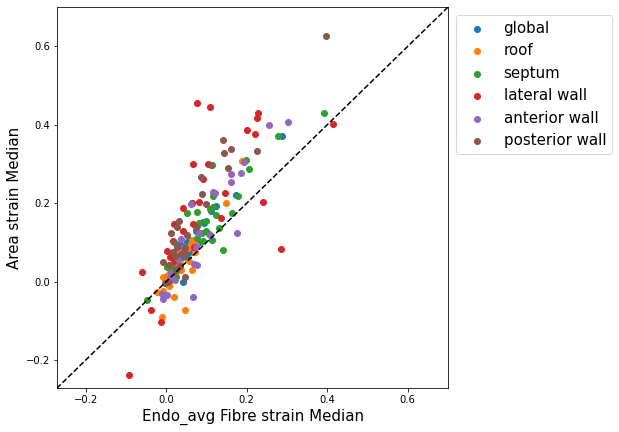

In [56]:
## Plotting Median

fig, ((ax1)) = plt.subplots(1,1,figsize=(7,7), 
                            facecolor='white', sharey=True)

## Scatter plot enables one to look on a case by case basis

ax1.scatter(fib_med[:, -2], area_med[:], label="global")
ax1.scatter(fib_reg_med[:, 0, 0], area_reg_med[:, 0], label="roof")
ax1.scatter(fib_reg_med[:, 1, 0], area_reg_med[:, 1], label="septum")
ax1.scatter(fib_reg_med[:, 2, 0], area_reg_med[:, 2], label="lateral wall")
ax1.scatter(fib_reg_med[:, 3, 0], area_reg_med[:, 3], label="anterior wall")
ax1.scatter(fib_reg_med[:, 4, 0], area_reg_med[:, 4], label="posterior wall")


ax1.plot(np.arange(-0.3,1,0.1), np.arange(-0.3,1,0.1), ls='--', c='black')

ax1.set_xlabel("Endo_avg Fibre strain Median", fontsize=15)
ax1.set_ylabel("Area strain Median", fontsize=15)
plt.ylim(-0.27, 0.7)
plt.xlim(-0.27, 0.7)

ax1.legend(fontsize=15, bbox_to_anchor=(1., 1.))

In [57]:
## Calculate pearson r coeff between area and DTMRI fibs
## Calculate rmse

pearsonr_glob = stats.pearsonr(fib_med[:, -2], area_med[:])
pearsonr_reg = np.zeros((5,))

RMSE_glob = mean_squared_error(fib_med[:, -2], area_med[:], 
                               squared=False)
RMSE_reg = np.zeros((5,))

print(f"Global:\t\tr:\t{np.round(pearsonr_glob[0],3)}\trmse:\t{np.round(RMSE_glob, 3)}")

for i in range(0, 5):
    pearsonr_reg[i] = stats.pearsonr(fib_reg_med[:, i, 0], 
                                 area_reg_med[:, i])[0]
    RMSE_reg[i] = mean_squared_error(fib_reg_med[:, i, 0], 
                                 area_reg_med[:, i], squared=False)
    

    print(f"Region: {regions[i]}",
         f"\tr:\t{np.round(pearsonr_reg[i],3)}",
         f"\trmse:\t{np.round(RMSE_reg[i],3)}")

Global:		r:	0.958	rmse:	0.043
Region: roof 	r:	0.883 	rmse:	0.042
Region: sept 	r:	0.876 	rmse:	0.072
Region: lat 	r:	0.679 	rmse:	0.156
Region: ant 	r:	0.916 	rmse:	0.072
Region: post 	r:	0.936 	rmse:	0.112


Text(0.5, -0.02, 'Fibre Strain med')

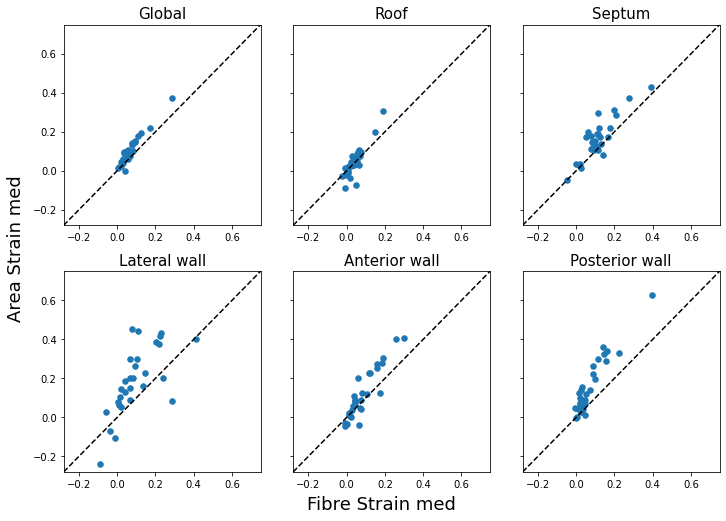

In [67]:
## Plotting med

fig, ((ax1, ax2, ax3), 
      (ax4, ax5, ax6)) = plt.subplots(2,3,figsize=(10,7), 
                            facecolor='white', sharey=True)

## Scatter plot enables one to look on a case by case basis

ax1.scatter(fib_med[:, -2], area_med[:], label="Global",s=30, alpha=1.0)
ax2.scatter(fib_reg_med[:, 0, 0], area_reg_med[:, 0], label="Roof",s=30, alpha=1.0)
ax3.scatter(fib_reg_med[:, 1, 0], area_reg_med[:, 1], label="Septum",s=30, alpha=1.0)
ax4.scatter(fib_reg_med[:, 2, 0], area_reg_med[:, 2], label="Lateral wall",s=30, alpha=1.0)
ax5.scatter(fib_reg_med[:, 3, 0], area_reg_med[:, 3], label="Anterior wall",s=30, alpha=1.0)
ax6.scatter(fib_reg_med[:, 4, 0], area_reg_med[:, 4], label="Posterior wall",s=30, alpha=1.0)

ax1.plot(np.arange(-0.28,1,0.1), np.arange(-0.28,1,0.1), ls='--', c='black')
ax2.plot(np.arange(-0.28,1,0.1), np.arange(-0.28,1,0.1), ls='--', c='black')
ax3.plot(np.arange(-0.28,1,0.1), np.arange(-0.28,1,0.1), ls='--', c='black')
ax4.plot(np.arange(-0.28,1,0.1), np.arange(-0.28,1,0.1), ls='--', c='black')
ax5.plot(np.arange(-0.28,1,0.1), np.arange(-0.28,1,0.1), ls='--', c='black')
ax6.plot(np.arange(-0.28,1,0.1), np.arange(-0.28,1,0.1), ls='--', c='black')

# ax1.set_xlabel("Fibre strain Standard Deviation", fontsize=20)
ax1.set_ylim(-0.28, 0.75)
ax1.set_xlim(-0.28, 0.75)
ax2.set_ylim(-0.28, 0.75)
ax2.set_xlim(-0.28, 0.75)
ax3.set_ylim(-0.28, 0.75)
ax3.set_xlim(-0.28, 0.75)
ax4.set_ylim(-0.28, 0.75)
ax4.set_xlim(-0.28, 0.75)
ax5.set_ylim(-0.28, 0.75)
ax5.set_xlim(-0.28, 0.75)
ax6.set_ylim(-0.28, 0.75)
ax6.set_xlim(-0.28, 0.75)

ax1.set_title("Global", fontsize=15)
ax2.set_title("Roof", fontsize=15)
ax3.set_title("Septum", fontsize=15)
ax4.set_title("Lateral wall", fontsize=15)
ax5.set_title("Anterior wall", fontsize=15)
ax6.set_title("Posterior wall", fontsize=15)
plt.tight_layout()

plt.yticks(fontsize=15)
fig.text(-0.02, 0.5, "Area Strain med",
         va='center', rotation='vertical', fontsize=18)
fig.text(0.5, -0.02, "Fibre Strain med", 
         ha='center', fontsize=18)

# ax1.legend(fontsize=15, bbox_to_anchor=(1., 1.))
# plt.savefig("/home/csi20/Dropbox/phd/Documents/HRS23/abstract_2/med_scatter_areastrains.png",
#            dpi=200, bbox_inches="tight")